In [19]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from img_util import imshow
import skimage as ski


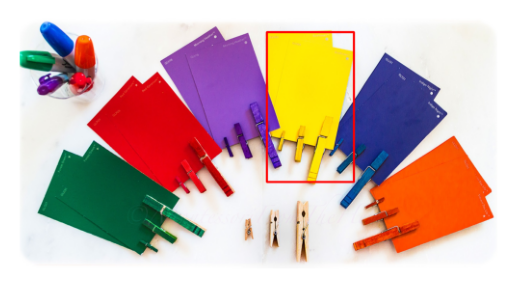

In [3]:
img=cv2.imread('download.png')
imshow(img[:,:,::-1],'')

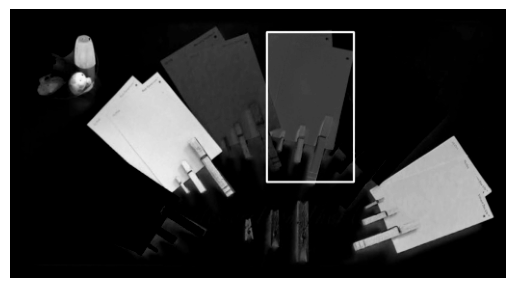

In [4]:
red_img=cv2.subtract(img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
imshow(red_img,'','gray')

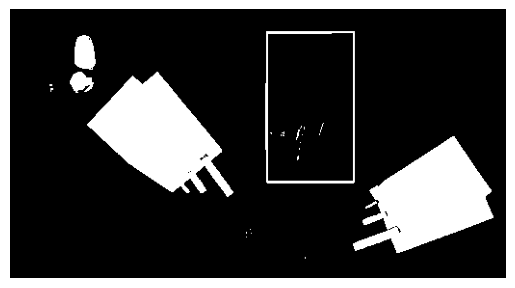

In [5]:
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [6]:
strel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

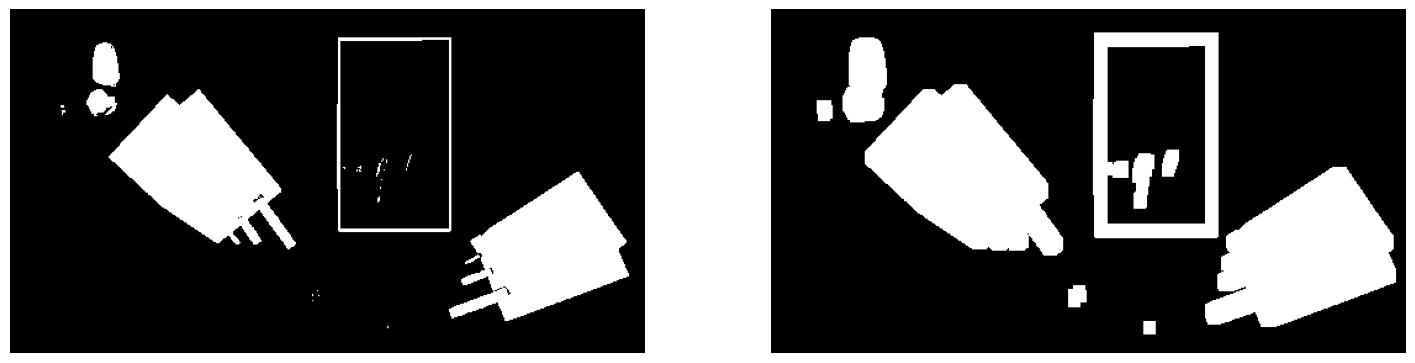

In [7]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_dilate=cv2.dilate(red_bw,strel)
imshow(red_dilate,'','gray')

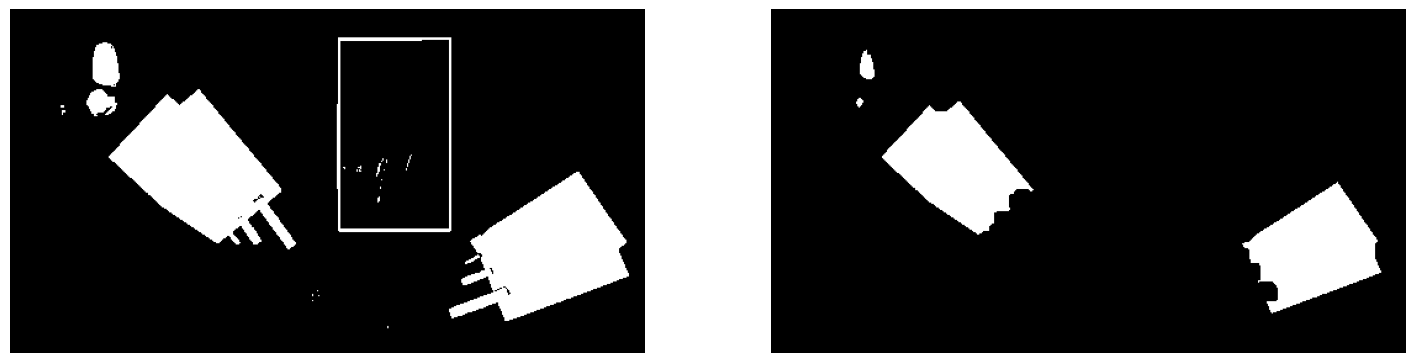

In [8]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_erode=cv2.erode(red_bw,strel)
imshow(red_erode,'','gray')

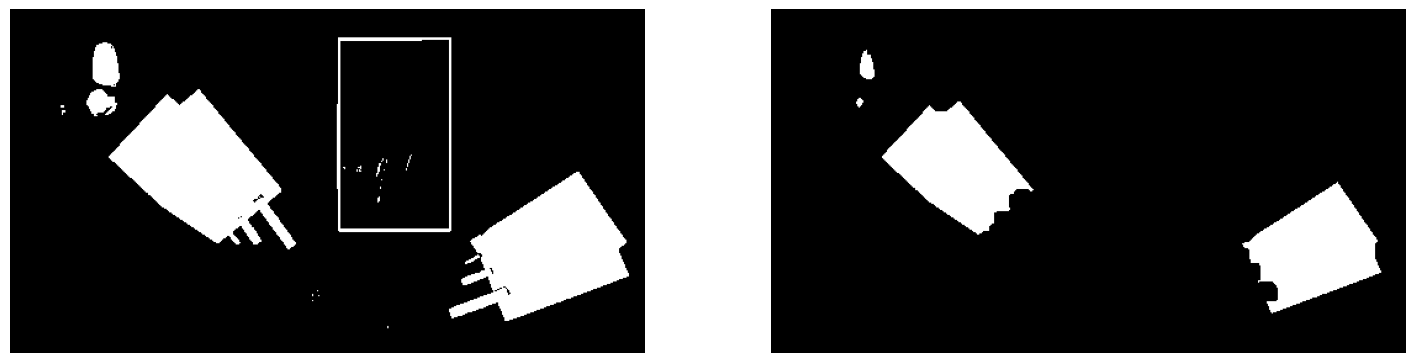

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_open=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel)
imshow(red_erode,'','gray')

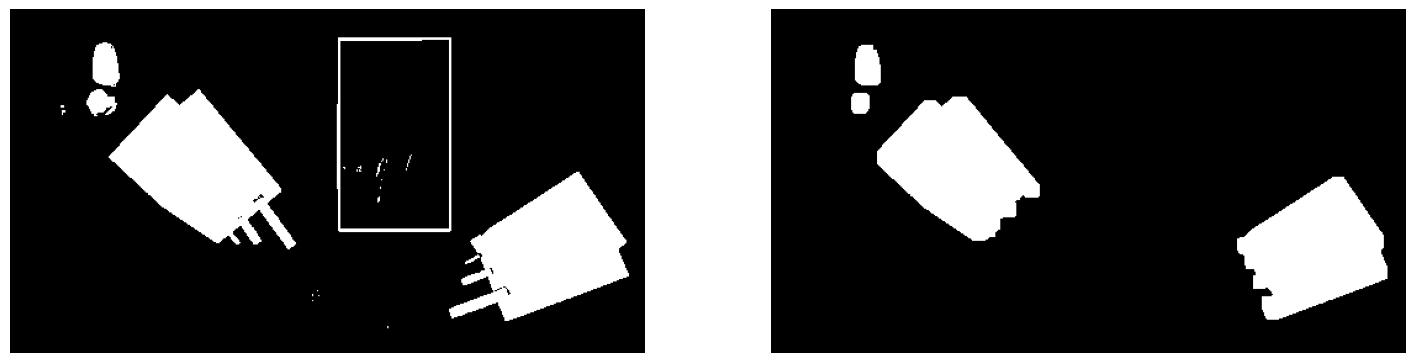

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close,'','gray')

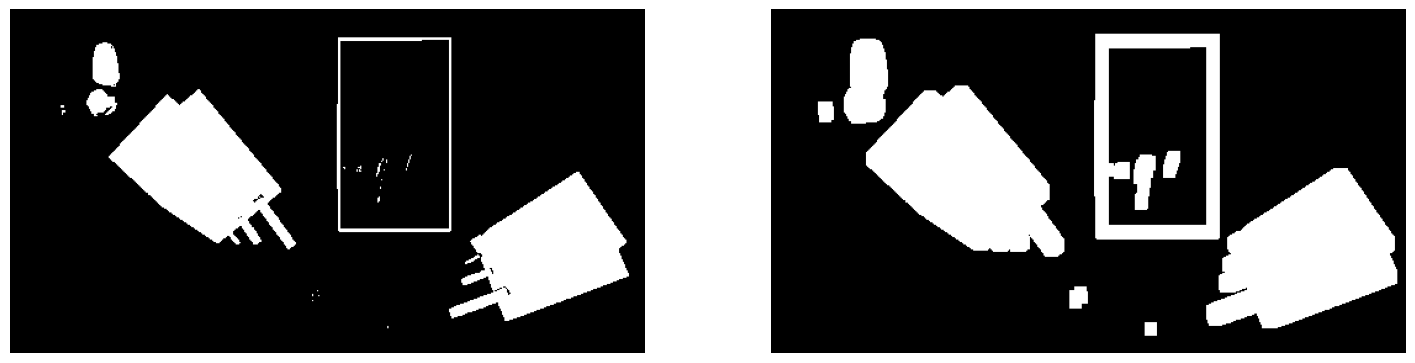

In [17]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close2,'','gray')

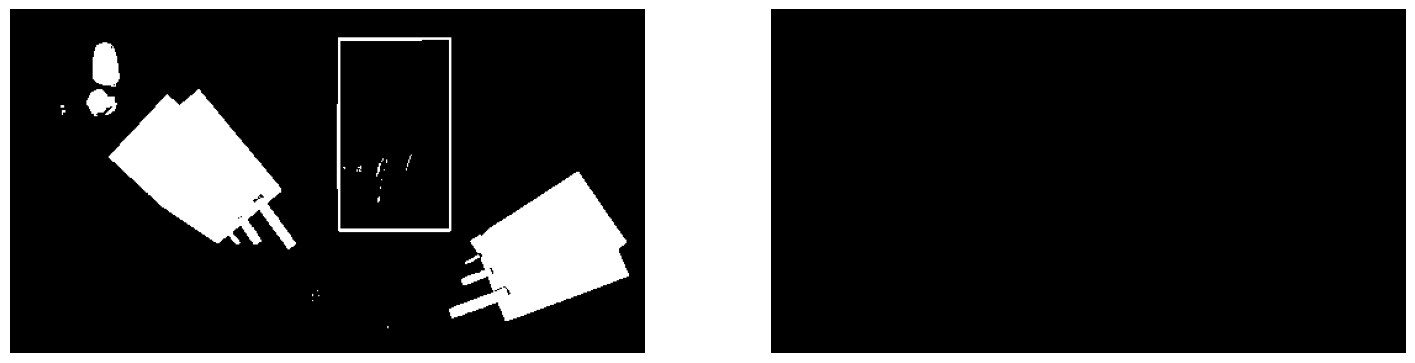

In [21]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
imshow(red_close3,'','gray')